imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Open data

In [2]:
data = pd.read_csv('./data/clean_data.csv')
data.head()

,id,name,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,...,is_violent_recid,vr_charge_degree,vr_offense_date,vr_charge_desc,score_text,screening_date,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,0,...,0,NaN,NaN,NaN,Low,14/08/2013,1,Low,0,0
1,2.0,miguel hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,0,...,0,NaN,NaN,NaN,Low,14/08/2013,1,Low,0,0
2,3.0,michael ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,...,0,NaN,NaN,NaN,Medium,31/12/2014,2,Low,0,0
3,4.0,kevon dixon,Male,22/01/1982,34,25 - 45,African-American,0,3,0,...,1,(F3),05/07/2013,Felony Battery (Dom Strang),Low,27/01/2013,1,Low,0,1
4,5.0,ed philo,Male,14/05/1991,24,Less than 25,African-American,0,4,0,...,0,NaN,NaN,NaN,Low,14/04/2013,3,Low,4,0


unique people

In [3]:
new_data = data.drop_duplicates(subset=['name', 'dob'])
print(data.shape)
print(new_data.shape)


(15513, 34)
(10999, 34)


sexe

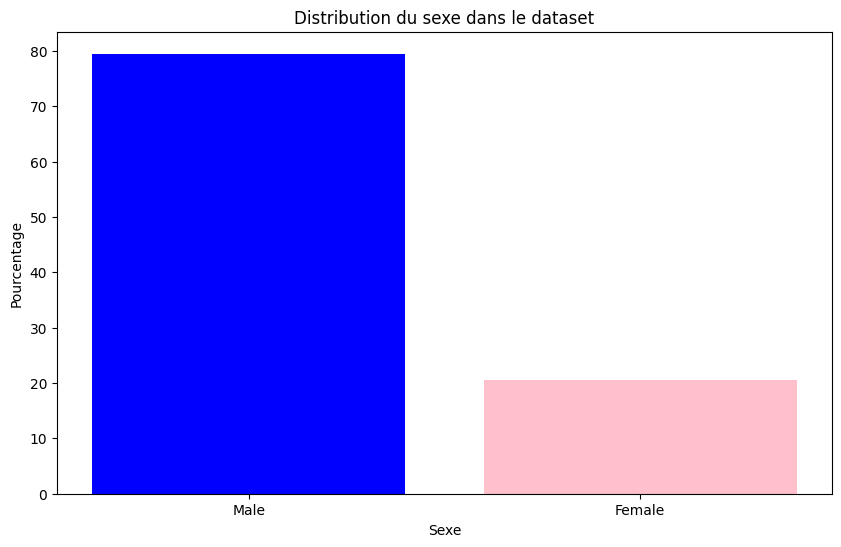

In [4]:
sex_counts = new_data['sex'].value_counts()
sex_percentage = (sex_counts/sex_counts.sum())*100

plt.figure(figsize=(10, 6))
plt.bar(sex_counts.index, sex_percentage,color=['blue','pink'])
plt.xlabel('Sexe')
plt.ylabel('Pourcentage')
plt.title("Distribution du sexe dans le dataset")
plt.show()

race

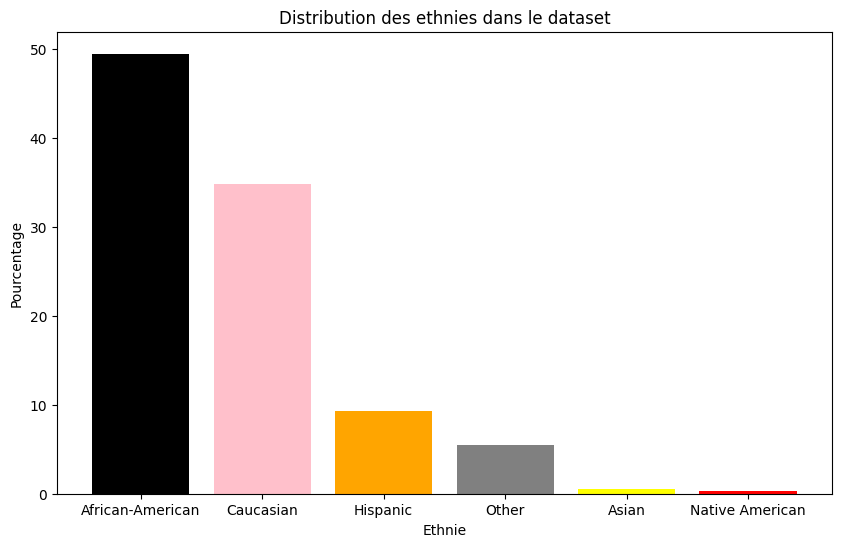

In [5]:
race_counts = new_data['race'].value_counts()
race_percentages = (race_counts / race_counts.sum()) * 100

plt.figure(figsize=(10, 6))
plt.bar(race_counts.index, race_percentages, color = ['black','pink','orange','gray','yellow','red'])
plt.xlabel('Ethnie')
plt.ylabel('Pourcentage')
plt.title("Distribution des ethnies dans le dataset")
plt.show()

age

C:\Users\mathy\AppData\Local\Temp\ipykernel_8620\2500215570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['age_group'] = pd.cut(new_data['age'], bins=bins, labels=labels, right=False)
C:\Users\mathy\AppData\Local\Temp\ipykernel_8620\2500215570.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = new_data.groupby(['sex', 'age_group']).size().unstack('sex', fill_value=0)


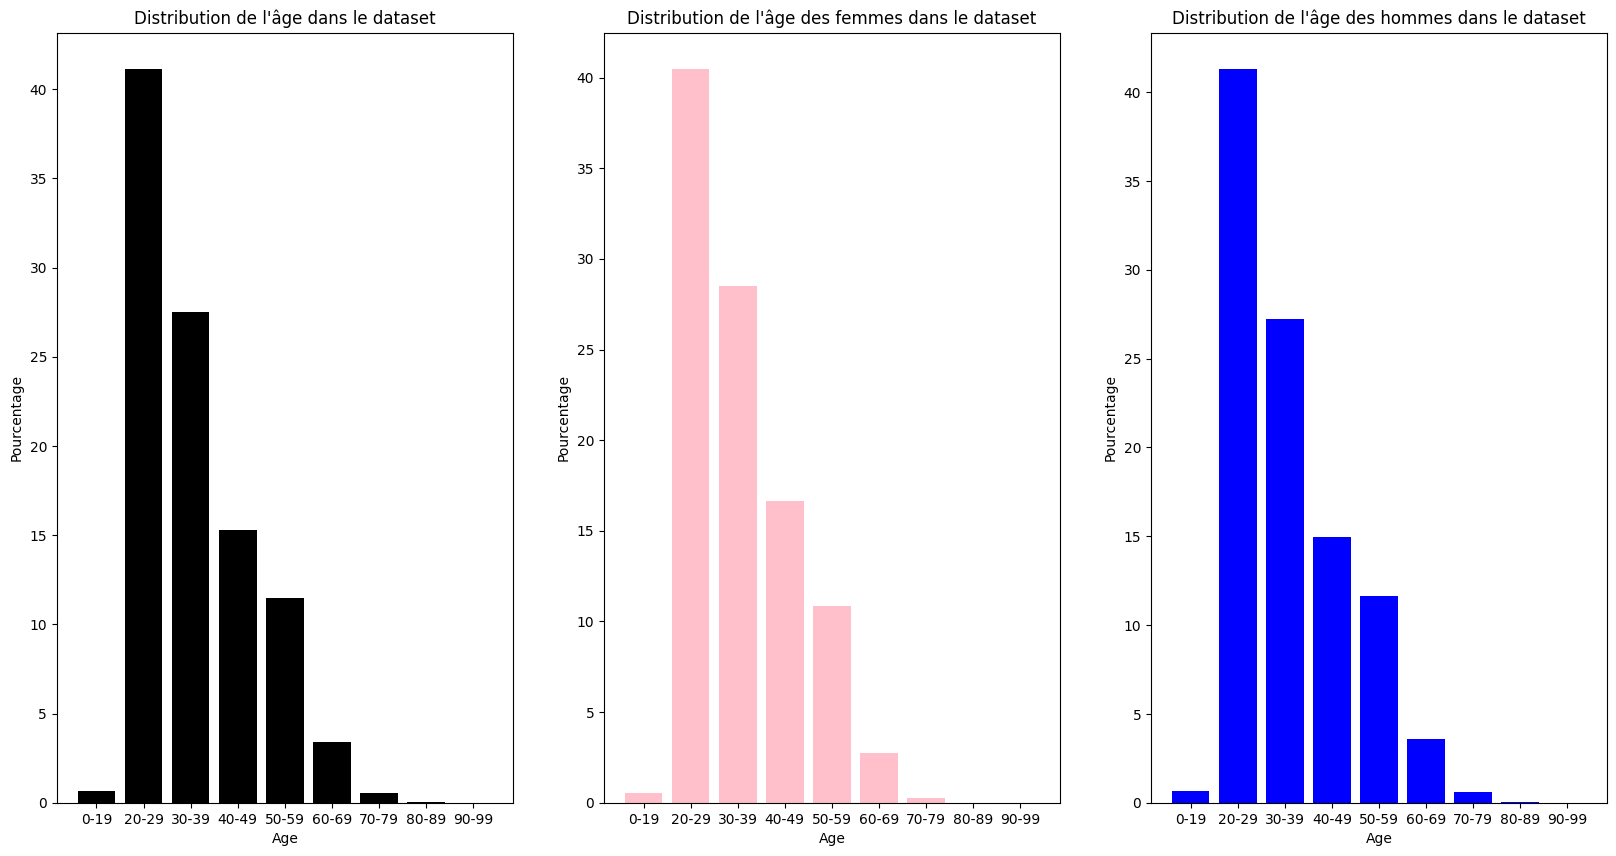

In [6]:
#grouped by 10 years gap
bins =  [0,20] + list(range(30,101,10))
labels = ['0-19'] + [f"{i}-{i+9}" for i in range(20, 100, 10)]


new_data['age_group'] = pd.cut(new_data['age'], bins=bins, labels=labels, right=False)

age_counts = new_data['age_group'].value_counts().sort_index()
age_percentage = (age_counts/age_counts.sum())*100
age_sex_counts = new_data.groupby(['sex', 'age_group']).size().unstack('sex', fill_value=0)
age_sex_percentage = (age_sex_counts/age_sex_counts.sum())*100
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.bar(age_counts.index, age_percentage, color = 'black')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge dans le dataset")
plt.subplot(1, 3, 2)
plt.bar(age_sex_counts.index, age_sex_percentage['Female'],color='pink')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des femmes dans le dataset")
plt.subplot(1, 3, 3)
plt.bar(age_sex_counts.index, age_sex_percentage['Male'],color='blue')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des hommes dans le dataset")
plt.show()

sex by race

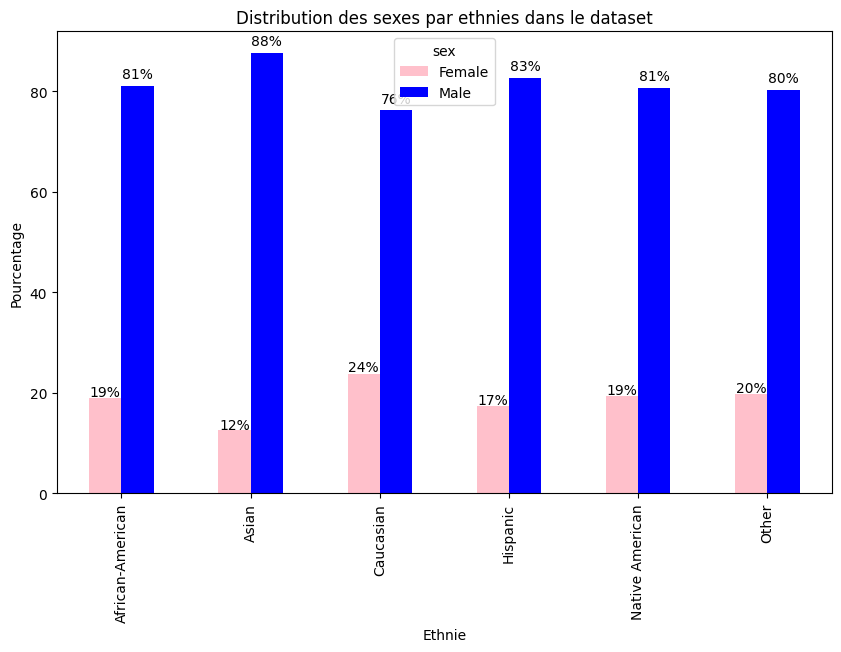

In [7]:
# Group by 'race' and 'sex' and get counts
race_sex_counts = new_data.groupby(['race', 'sex']).size().unstack('sex', fill_value=0)
# Calculate internal percentages
race_sex_percentage = (race_sex_counts.div(race_sex_counts.sum(axis=1), axis=0)) * 100

# Plot bar chart
ax = race_sex_percentage.plot(kind='bar',color=['pink','blue'], stacked=False, figsize=(10, 6))

# Add percentage annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height*1.02), ha='center')

plt.xlabel('Ethnie')
plt.ylabel('Pourcentage')
plt.title("Distribution des sexes par ethnies dans le dataset")
plt.show()


age by race

C:\Users\mathy\AppData\Local\Temp\ipykernel_8620\3855392204.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = new_data.groupby(['race', 'age_group']).size().unstack('race', fill_value=0)


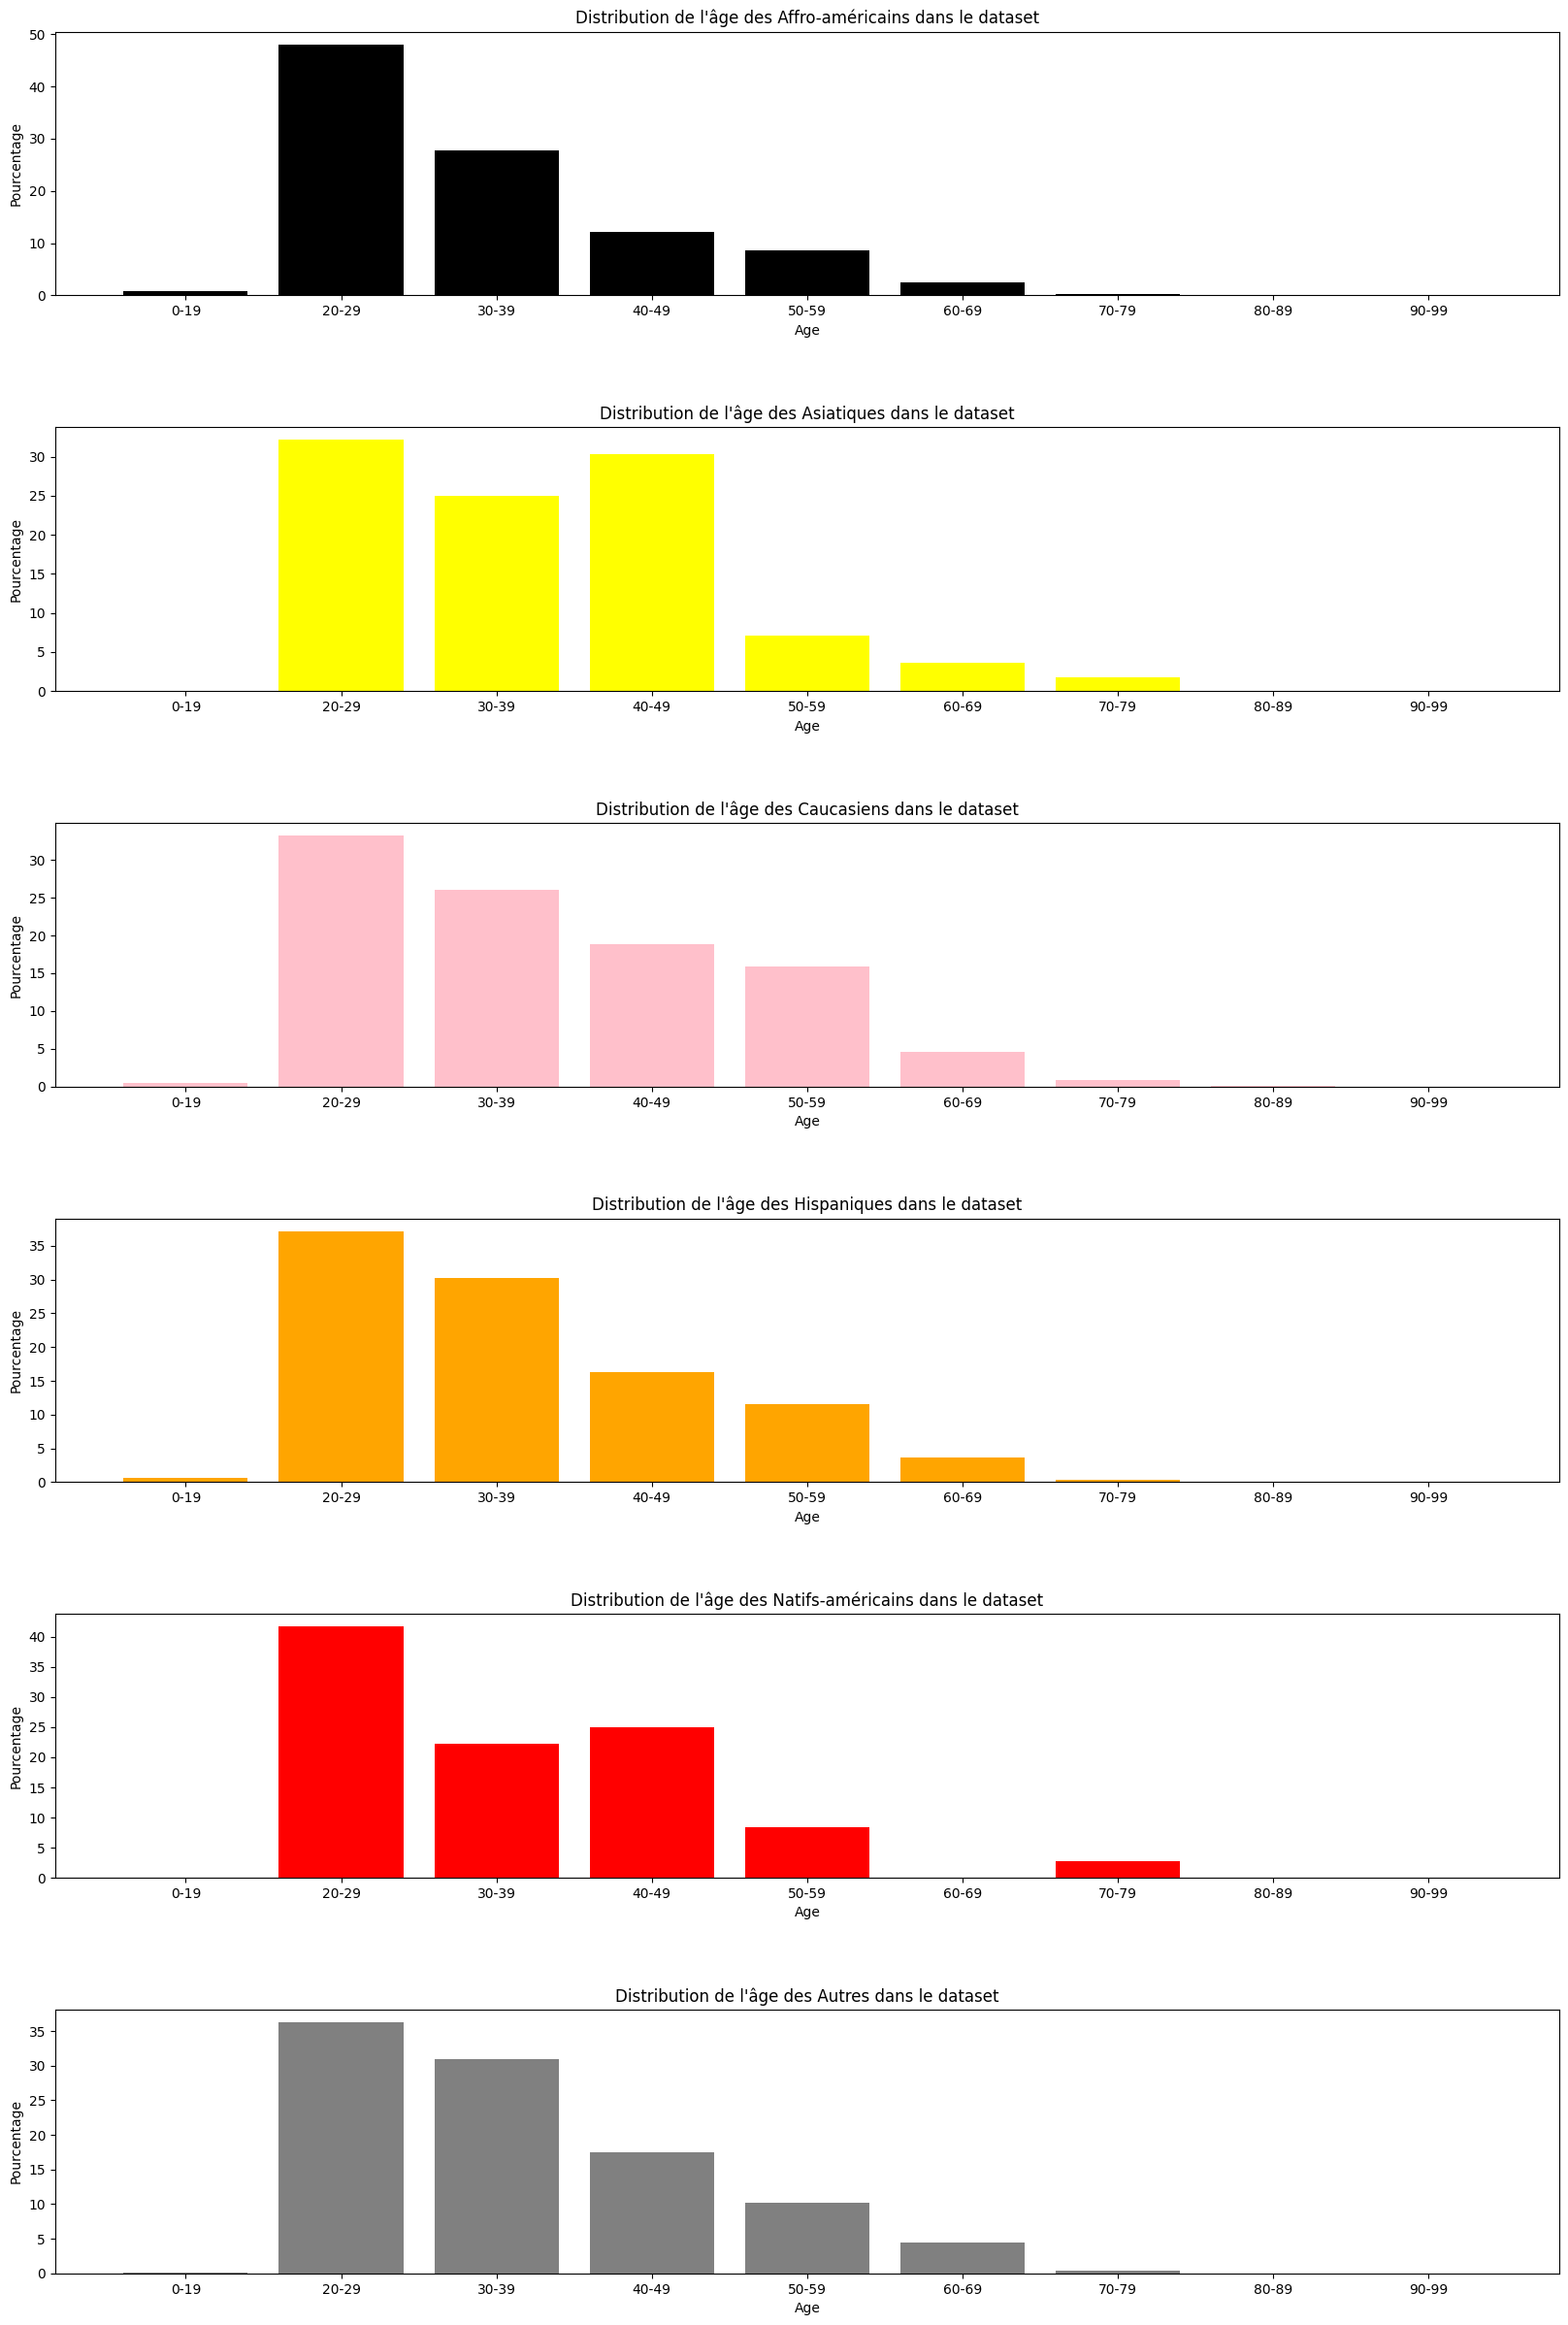

In [8]:
age_sex_counts = new_data.groupby(['race', 'age_group']).size().unstack('race', fill_value=0)
age_sex_percentage = (age_sex_counts/age_sex_counts.sum())*100

plt.figure(figsize=(20, 30))
plt.subplot(6, 1, 1)
plt.bar(age_sex_percentage.index, age_sex_percentage['African-American'], color = 'black')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des Affro-américains dans le dataset")
plt.subplot(6, 1, 2)
plt.bar(age_sex_percentage.index, age_sex_percentage['Asian'], color = 'yellow')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des Asiatiques dans le dataset")
plt.subplot(6, 1, 3)
plt.bar(age_sex_percentage.index, age_sex_percentage['Caucasian'], color = 'pink')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des Caucasiens dans le dataset")
plt.subplot(6, 1, 4)
plt.bar(age_sex_percentage.index, age_sex_percentage['Hispanic'], color = 'orange')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des Hispaniques dans le dataset")
plt.subplot(6, 1, 5)
plt.bar(age_sex_percentage.index, age_sex_percentage['Native American'], color = 'red')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des Natifs-américains dans le dataset")
plt.subplot(6, 1, 6)
plt.bar(age_sex_percentage.index, age_sex_percentage['Other'], color = 'gray')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.title("Distribution de l'âge des Autres dans le dataset")
plt.subplots_adjust(hspace=0.5)

plt.show()